In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')


sizes = range(10000, 1000001, 20000)
number = 1000


def plot_time_complexity(sizes, times, xlabel, ylabel, labels='None'):
    
    markers = ['.', '^']
    
    fig, ax = plt.subplots()
    
    # If plotting multiple operations
    if isinstance(times, tuple):
        for t, m, l in zip(times, markers, labels):
            ax.plot(sizes, t, marker=m, linestyle='none', label=l)
        plt.legend()
    else:
        ax.plot(sizes, times, marker='.', linestyle='none')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [2]:
plt.rcParams['figure.figsize'] = 9, 6

#### Common order of magnitude functions

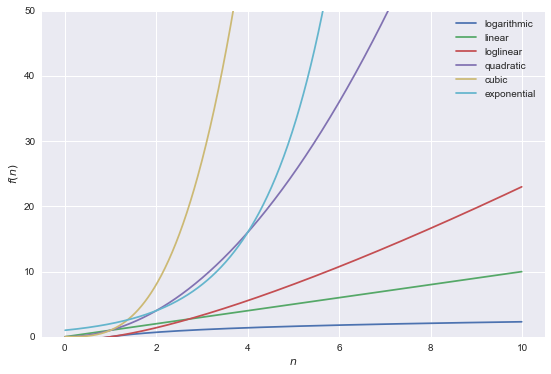

In [3]:
ns = np.arange(0.01, 10, 0.01)
logarithmic = np.log(ns)
linear = ns
loglinear = ns * logarithmic
quadratic = ns ** 2
cubic = ns ** 3
exponential = 2 ** ns

fig, ax = plt.subplots()
for l in ['logarithmic', 'linear', 'loglinear', 'quadratic', 'cubic', 'exponential']:
    ax.plot(ns, eval(l), label=l)
ax.set_ylim(0, 50)
ax.set_xlabel('$n$')
ax.set_ylabel('$f(n)$')
plt.legend()
plt.show()

#### 1. List index operator is $O(1)$

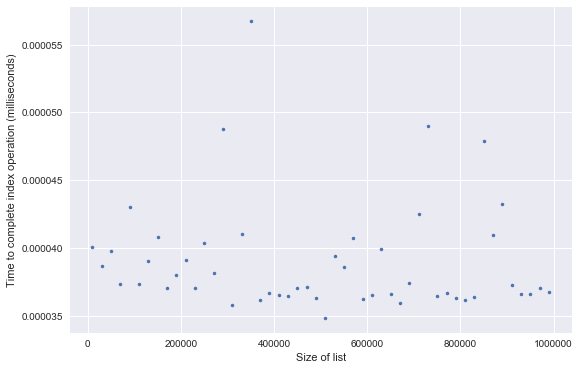

In [4]:
t = timeit.Timer('ls[0]', 'from __main__ import ls')

times = []
for s in sizes:
    ls = list(range(s))
    times.append(t.timeit(number=number))

plot_time_complexity(sizes, times, 'Size of list',
                     'Time to complete index operation (milliseconds)')

#### 2. Get item and set item are $O(1)$ for dictionaries

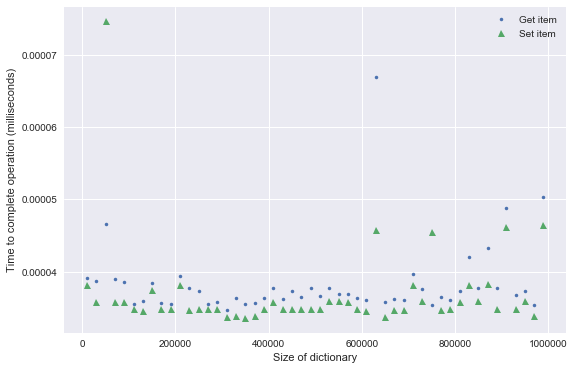

In [5]:
get_t = timeit.Timer('d[0]', 'from __main__ import d')
set_t = timeit.Timer('d[0] = 0', 'from __main__ import d')

get_times = []
set_times = []
for s in sizes:
    d = {i: None for i in range(s)}
    get_times.append(t.timeit(number=number))
    set_times.append(t.timeit(number=number))

plot_time_complexity(sizes, (get_times, set_times),
                     'Size of dictionary',
                     'Time to complete operation (milliseconds)',
                     ['Get item', 'Set item'])

#### 3. Performance of the `del` operator on lists ($O(n)$) and dictionaries ($O(1)$)

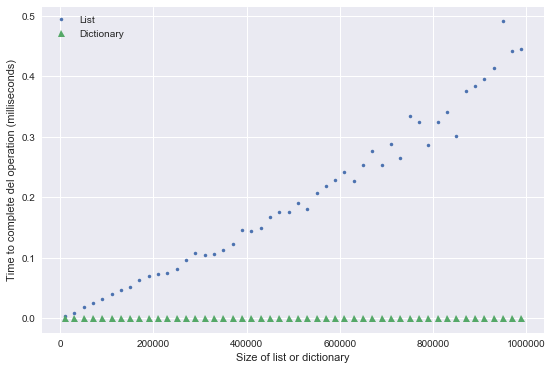

In [6]:
t = timeit.Timer('del x[next(i)]', 'from __main__ import x, i')

ls_times = []
d_times = []
for s in sizes:
    x = list(range(s))
    i = iter(range(number))
    ls_times.append(t.timeit(number=number))
    x = {i: None for i in range(s)}
    # Use an iterator to generate the next key to delete
    i = iter(range(number))
    d_times.append(t.timeit(number=number))

plot_time_complexity(sizes, (ls_times, d_times),
                     'Size of list or dictionary',
                     'Time to complete del operation (milliseconds)',
                     ['List', 'Dictionary'])

#### 4. Find the kth smallest number in a list

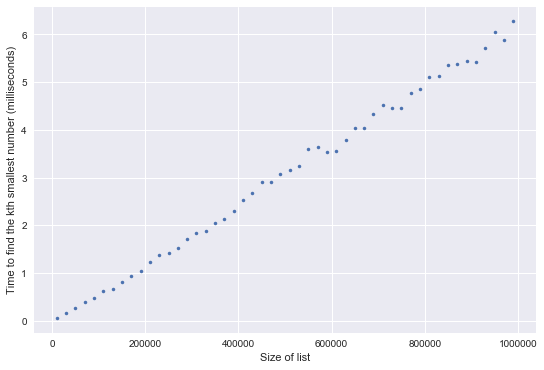

In [7]:
def find_kth_smallest_loglinear(ls, k):
    """Given a list of numbers in random order, return the kth smallest number
    in O(nlog(n))."""
    ls.sort()
    m = ls[k-1]
    return m


ll_t = timeit.Timer('find_kth_smallest_loglinear(ls, 3)',
                    'from __main__ import find_kth_smallest_loglinear, ls')

ll_times = []
for s in sizes:
    ls = list(range(s))
    ll_times.append(ll_t.timeit(number=number))

plot_time_complexity(sizes, ll_times, 'Size of list',
                     'Time to find the kth smallest number (milliseconds)')